# The Intro to Neural Network

## Data Structure for Neural Network

In [1]:
# Value Object

class Value:
    
    def __init__(self,data):
        self.data = data
        
    # represent nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data)
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data)
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data)
        return out

In [2]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)
print(a,b)

Value(data=2.0) Value(data=-3.0)


In [3]:
print(type(a))

<class '__main__.Value'>


In [4]:
print(a + b) 
# internally python will call
# a.__add__(b)

Value(data=-1.0)


In [5]:
newObj = a + b
print(newObj)

Value(data=-1.0)


In [6]:
print(a * b)

Value(data=-6.0)


In [7]:
print(a - b)

Value(data=5.0)


In [8]:
print(a*b + c)

Value(data=4.0)


In [9]:
# internally
print((a.__mul__(b)).__add__(c))

Value(data=4.0)


In [10]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c

In [11]:
print(d)

Value(data=4.0)


# Updating Value Obj

### let's see connected tissue of expressions
### i.e what value produce what another value

In [12]:
# Value Obj

class Value:
    
    def __init__( self, data, _children=(), _op='' ):
        self.data = data
        self._prev = set(_children)
        self._op = _op # operation
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [13]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c
print(d)

Value(data=4.0)


In [14]:
print(d._prev)

# a*b = -6,0
# c = 10.0

{Value(data=-6.0), Value(data=10.0)}


In [15]:
print(d._op)

+


In [16]:
print(a._prev)
# empty set --> 'cause its not produce from previous expression

set()


In [17]:
z = a*b
print(z)
print("Operation: ", z._op)
print(f"{z._prev = }")

Value(data=-6.0)
Operation:  *
z._prev = {Value(data=-3.0), Value(data=2.0)}


# Step 1: Install Graphviz binary

## Windows:

1. Download Graphviz from [Graphviz website](http://www.graphviz.org/download/).
2. Add the following paths to the PATH environment variable (replace `{graphviz_version}` with the installed Graphviz version):
    - `C:\Program Files (x86)\Graphviz{graphviz_version}\bin`
    - `C:\Program Files (x86)\Graphviz{graphviz_version}\bin\dot.exe`
3. Close any opened Jupyter notebook and the command prompt.
4. Restart Jupyter or the command prompt and test.

## Linux:

1. Update package information:
    ```bash
    sudo apt-get update
    ```
2. Install Graphviz:
    ```bash
    sudo apt-get install graphviz
    ```
    or build it manually from [Graphviz website](http://www.graphviz.org/download/).

# Step 2: Install graphviz module for python

## pip:

```bash
pip install graphviz
```

 # Graph Tracing Explanation

The provided Python code snippet demonstrates a function for tracing a graph using the Graphviz library. Let's break down its functionality:

1. **Importing Dependencies**:
    - `from graphviz import Digraph`: This line imports the `Digraph` class from the Graphviz library, which is used to represent directed graphs.

2. **Defining the Trace Function**:
    - `def trace(root)`: This function, named `trace`, is defined to trace a graph starting from a given root node.

3. **Inside the Trace Function**:
    - **Initializing Nodes and Edges**:
        - `nodes, edges = set(), set()`: Two empty sets, `nodes` and `edges`, are initialized to store the nodes and edges of the graph, respectively.

    - **Defining the Build Function**:
        - `def build(value)`: This function, `build`, is an inner function of `trace` responsible for recursively traversing the graph from a given node.

    - **Checking Node Existence**:
        - `if value not in nodes:`: This condition checks if the current node `value` is not already in the set of nodes. If not, it adds the node to the `nodes` set.

    - **Traversing Through Predecessors**:
        - `for child in value._prev:`: This loop iterates over the predecessors (or parents) of the current node `value`, as stored in the `_prev` attribute of the `value` object.

    - **Adding Edges**:
        - `edges.add((child, value))`: For each predecessor `child`, it adds an edge from `child` to `value` to the set of `edges`.

    - **Recursive Call**:
        - `build(child)`: Recursively calls the `build` function for each predecessor `child`, effectively exploring the graph depth-first.

    - **Initiating Tracing**:
        - `build(root)`: This line initiates the tracing process by calling the `build` function with the root node of the graph.

    - **Returning Collected Nodes and Edges**:
        - `return nodes, edges`: Finally, the function returns the sets of nodes and edges that were collected during the tracing process.

This code is designed to trace the graph starting from a given root node, collecting all the nodes and edges encountered during the traversal. These sets of nodes and edges can then be used for further analysis or visualization.


In [18]:
from graphviz import Digraph

In [19]:
def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    print("nodes: ", nodes)
    print("edges: ", edges)
    def build(value):
        print("value: ", value)
        if value not in nodes:
            nodes.add(value)
            print("nodes: ", nodes)
            
            for child in value._prev:
                print("value._prev: ", value._prev)
                print("child: ", child)
                edges.add((child, value))
                print("edges: ", edges)
                build(child)
                
    build(root)
    print("final nodes: ", nodes)
    print("final edges: ", edges)
    return nodes, edges

In [20]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b
print(d)
print('----------------------')
trace(d)

Value(data=-6.0)
----------------------
nodes:  set()
edges:  set()
value:  Value(data=-6.0)
nodes:  {Value(data=-6.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=2.0)
edges:  {(Value(data=2.0), Value(data=-6.0))}
value:  Value(data=2.0)
nodes:  {Value(data=2.0), Value(data=-6.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}
value:  Value(data=-3.0)
nodes:  {Value(data=2.0), Value(data=-3.0), Value(data=-6.0)}
final nodes:  {Value(data=2.0), Value(data=-3.0), Value(data=-6.0)}
final edges:  {(Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0))}


({Value(data=-3.0), Value(data=-6.0), Value(data=2.0)},
 {(Value(data=-3.0), Value(data=-6.0)), (Value(data=2.0), Value(data=-6.0))})

In [21]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c
print(d)
print('----------------------')
trace(d)

Value(data=4.0)
----------------------
nodes:  set()
edges:  set()
value:  Value(data=4.0)
nodes:  {Value(data=4.0)}
value._prev:  {Value(data=10.0), Value(data=-6.0)}
child:  Value(data=10.0)
edges:  {(Value(data=10.0), Value(data=4.0))}
value:  Value(data=10.0)
nodes:  {Value(data=4.0), Value(data=10.0)}
value._prev:  {Value(data=10.0), Value(data=-6.0)}
child:  Value(data=-6.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=10.0), Value(data=4.0))}
value:  Value(data=-6.0)
nodes:  {Value(data=4.0), Value(data=-6.0), Value(data=10.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=2.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=10.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0))}
value:  Value(data=2.0)
nodes:  {Value(data=2.0), Value(data=4.0), Value(data=-6.0), Value(data=10.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=10.0), Value(dat

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [22]:
complex_eg = a*b - c + b*c 
complex_eg

Value(data=-46.0)

In [23]:
trace(complex_eg)

nodes:  set()
edges:  set()
value:  Value(data=-46.0)
nodes:  {Value(data=-46.0)}
value._prev:  {Value(data=-30.0), Value(data=-16.0)}
child:  Value(data=-30.0)
edges:  {(Value(data=-30.0), Value(data=-46.0))}
value:  Value(data=-30.0)
nodes:  {Value(data=-30.0), Value(data=-46.0)}
value._prev:  {Value(data=10.0), Value(data=-3.0)}
child:  Value(data=10.0)
edges:  {(Value(data=-30.0), Value(data=-46.0)), (Value(data=10.0), Value(data=-30.0))}
value:  Value(data=10.0)
nodes:  {Value(data=-30.0), Value(data=-46.0), Value(data=10.0)}
value._prev:  {Value(data=10.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=-3.0), Value(data=-30.0)), (Value(data=-30.0), Value(data=-46.0)), (Value(data=10.0), Value(data=-30.0))}
value:  Value(data=-3.0)
nodes:  {Value(data=-30.0), Value(data=-3.0), Value(data=-46.0), Value(data=10.0)}
value._prev:  {Value(data=-30.0), Value(data=-16.0)}
child:  Value(data=-16.0)
edges:  {(Value(data=-3.0), Value(data=-30.0)), (Value(data=-16.0), Value

({Value(data=-16.0),
  Value(data=-3.0),
  Value(data=-30.0),
  Value(data=-46.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0)},
 {(Value(data=-16.0), Value(data=-46.0)),
  (Value(data=-3.0), Value(data=-30.0)),
  (Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-30.0), Value(data=-46.0)),
  (Value(data=-6.0), Value(data=-16.0)),
  (Value(data=10.0), Value(data=-16.0)),
  (Value(data=10.0), Value(data=-30.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [24]:
trace(d)

nodes:  set()
edges:  set()
value:  Value(data=4.0)
nodes:  {Value(data=4.0)}
value._prev:  {Value(data=10.0), Value(data=-6.0)}
child:  Value(data=10.0)
edges:  {(Value(data=10.0), Value(data=4.0))}
value:  Value(data=10.0)
nodes:  {Value(data=4.0), Value(data=10.0)}
value._prev:  {Value(data=10.0), Value(data=-6.0)}
child:  Value(data=-6.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=10.0), Value(data=4.0))}
value:  Value(data=-6.0)
nodes:  {Value(data=4.0), Value(data=-6.0), Value(data=10.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=2.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=10.0), Value(data=4.0)), (Value(data=2.0), Value(data=-6.0))}
value:  Value(data=2.0)
nodes:  {Value(data=2.0), Value(data=4.0), Value(data=-6.0), Value(data=10.0)}
value._prev:  {Value(data=2.0), Value(data=-3.0)}
child:  Value(data=-3.0)
edges:  {(Value(data=-6.0), Value(data=4.0)), (Value(data=10.0), Value(data=4.0)), (Value(data=2.0), Value(data=-

({Value(data=-3.0),
  Value(data=-6.0),
  Value(data=10.0),
  Value(data=2.0),
  Value(data=4.0)},
 {(Value(data=-3.0), Value(data=-6.0)),
  (Value(data=-6.0), Value(data=4.0)),
  (Value(data=10.0), Value(data=4.0)),
  (Value(data=2.0), Value(data=-6.0))})

In [25]:
print(a)

Value(data=2.0)


In [26]:
trace(a)

nodes:  set()
edges:  set()
value:  Value(data=2.0)
nodes:  {Value(data=2.0)}
final nodes:  {Value(data=2.0)}
final edges:  set()


({Value(data=2.0)}, set())

### Recursion is a programming technique where a function calls itself directly or indirectly to solve a problem.

In [27]:
# recursion
def add(n):
    print(n)    
    if n < 100:
        n += n
        if n < 100:
            add(n)
add(5)

5
10
20
40
80


In [28]:
def lol(n):
    while(n<100):
        print(n)        
        n += n
lol(5)

5
10
20
40
80


In [29]:
print(type(id(a)))

print(id(a))
print(id(b))
print(id(c))
print(id(d))

print(id(z))
print(str(id(z)))

print(type(id(z)))
print(type(str(id(z))))

<class 'int'>
1879629057328
1879629067600
1879629063616
1879629068224
1879608154032
1879608154032
<class 'int'>
<class 'str'>


### 

In [30]:
# Value Obj

class Value:
    
    def __init__( self, data, _children=(), _operation='' ):
        self.data = data
        self._prev = set(_children)
        self._op = _operation
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [31]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    print(f"{nodes = }, {edges = }")
    for n in nodes:
        print(f"node = {n}")
        uid = str(id(n))
        print(f"{uid = }")
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape='record', color='orange', style="filled")
        if n._op:
            print(f"{n._op = }")
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        print(f"{n1 = }, {n2 = }")
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    print(f"{dot = }")
    return dot

d = Value(data=-1.0)

nodes = {Value(data=-3.0), Value(data=2.0), Value(data=-1.0)}, edges = {(Value(data=2.0), Value(data=-1.0)), (Value(data=-3.0), Value(data=-1.0))}
node = Value(data=-3.0)
uid = '1879629250368'
node = Value(data=2.0)
uid = '1879629249888'
node = Value(data=-1.0)
uid = '1879629239520'
n._op = '+'
n1 = Value(data=2.0), n2 = Value(data=-1.0)
n1 = Value(data=-3.0), n2 = Value(data=-1.0)
dot = <graphviz.graphs.Digraph object at 0x000001B5A2A23F10>


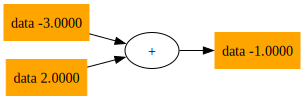

In [32]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a+b
print(f"{d = }\n")
draw_dot(d)

In [33]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10.0)

# expression
d = a*b + c

nodes = {Value(data=10.0), Value(data=4.0), Value(data=-6.0), Value(data=-3.0), Value(data=2.0)}, edges = {(Value(data=-6.0), Value(data=4.0)), (Value(data=-3.0), Value(data=-6.0)), (Value(data=2.0), Value(data=-6.0)), (Value(data=10.0), Value(data=4.0))}
node = Value(data=10.0)
uid = '1879629248112'
node = Value(data=4.0)
uid = '1879629249792'
n._op = '+'
node = Value(data=-6.0)
uid = '1879629246240'
n._op = '*'
node = Value(data=-3.0)
uid = '1879629248400'
node = Value(data=2.0)
uid = '1879629239280'
n1 = Value(data=-6.0), n2 = Value(data=4.0)
n1 = Value(data=-3.0), n2 = Value(data=-6.0)
n1 = Value(data=2.0), n2 = Value(data=-6.0)
n1 = Value(data=10.0), n2 = Value(data=4.0)
dot = <graphviz.graphs.Digraph object at 0x000001B5A2A23340>


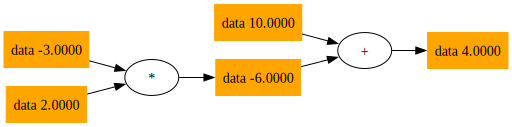

In [34]:
draw_dot(d)

nodes = {Value(data=2.0)}, edges = set()
node = Value(data=2.0)
uid = '1879629239280'
dot = <graphviz.graphs.Digraph object at 0x000001B5A2A23DF0>


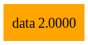

In [35]:
draw_dot(a)

nodes = {Value(data=-6.0), Value(data=2.0), Value(data=-3.0)}, edges = {(Value(data=-3.0), Value(data=-6.0)), (Value(data=2.0), Value(data=-6.0))}
node = Value(data=-6.0)
uid = '1879608154032'
n._op = '*'
node = Value(data=2.0)
uid = '1879608152544'
node = Value(data=-3.0)
uid = '1879608164016'
n1 = Value(data=-3.0), n2 = Value(data=-6.0)
n1 = Value(data=2.0), n2 = Value(data=-6.0)
dot = <graphviz.graphs.Digraph object at 0x000001B5A2A236D0>


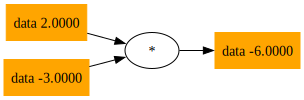

In [36]:
draw_dot(z)

nodes = {Value(data=-30.0), Value(data=2.0), Value(data=-3.0), Value(data=-46.0), Value(data=-16.0), Value(data=10.0), Value(data=-6.0)}, edges = {(Value(data=10.0), Value(data=-16.0)), (Value(data=10.0), Value(data=-30.0)), (Value(data=-3.0), Value(data=-30.0)), (Value(data=-30.0), Value(data=-46.0)), (Value(data=2.0), Value(data=-6.0)), (Value(data=-3.0), Value(data=-6.0)), (Value(data=-16.0), Value(data=-46.0)), (Value(data=-6.0), Value(data=-16.0))}
node = Value(data=-30.0)
uid = '1879629070048'
n._op = '*'
node = Value(data=2.0)
uid = '1879629057328'
node = Value(data=-3.0)
uid = '1879629067600'
node = Value(data=-46.0)
uid = '1879629069664'
n._op = '+'
node = Value(data=-16.0)
uid = '1879629056368'
n._op = '-'
node = Value(data=10.0)
uid = '1879629063616'
node = Value(data=-6.0)
uid = '1879629063664'
n._op = '*'
n1 = Value(data=10.0), n2 = Value(data=-16.0)
n1 = Value(data=10.0), n2 = Value(data=-30.0)
n1 = Value(data=-3.0), n2 = Value(data=-30.0)
n1 = Value(data=-30.0), n2 = Val

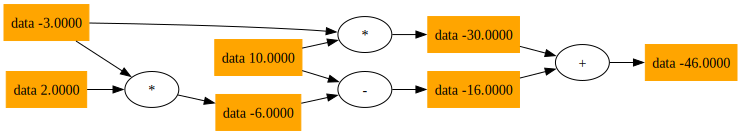

In [37]:
draw_dot(complex_eg)

# Updating Value Obj
## assigning label

In [38]:
# Value Obj

class Value:
    
    # _children as tuple because of unknown python efficiency
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self._prev = set(_children)
        self._op = _operation
        self.label = label
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [39]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

# expression
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')

L = d*f ; L.label='L'
L

Value(data=-8.0)

In [40]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right, TB = Top to Bottom

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data, ), shape='record')
        if n._op:
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

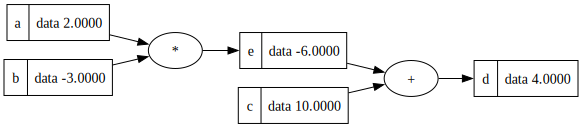

In [41]:
draw_dot(d)

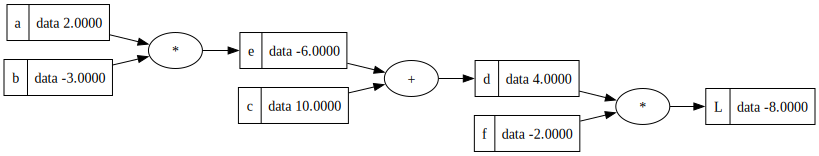

In [42]:
draw_dot(L)

In [52]:
print(draw_dot(L))

digraph {
	graph [rankdir=LR]
	1879629244944 [label="{ b | data -3.0000 | grad 0.0000 }" shape=record]
	1879629244272 [label="{ L | data -8.0000 | grad 0.0000 }" shape=record]
	"1879629244272*" [label="*"]
	"1879629244272*" -> 1879629244272
	1879629237456 [label="{ a | data 2.0000 | grad 0.0000 }" shape=record]
	1879629234912 [label="{ c | data 10.0000 | grad 0.0000 }" shape=record]
	1879629236592 [label="{ e | data -6.0000 | grad 0.0000 }" shape=record]
	"1879629236592*" [label="*"]
	"1879629236592*" -> 1879629236592
	1879629237120 [label="{ d | data 4.0000 | grad 0.0000 }" shape=record]
	"1879629237120+" [label="+"]
	"1879629237120+" -> 1879629237120
	1879629244848 [label="{ f | data -2.0000 | grad 0.0000 }" shape=record]
	1879629234912 -> "1879629237120+"
	1879629244944 -> "1879629236592*"
	1879629244848 -> "1879629244272*"
	1879629237120 -> "1879629244272*"
	1879629236592 -> "1879629237120+"
	1879629237456 -> "1879629236592*"
}



In [43]:
# Value Obj

class Value:
    
    # _children as tuple because of unknown python efficiency
    def __init__( self, data, _children=(), _operation='', label='' ):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _operation
        self.label = label
        
    # represents nicer looking expressions    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, otherObj):
        # return NEW Value Obj 
        out = Value(self.data + otherObj.data, (self, otherObj), '+' )
        return out
    
    def __mul__(self, otherObj):
        out = Value(self.data * otherObj.data, (self, otherObj), '*')
        return out
    
    def __sub__(self, otherObj):
        out = Value(self.data - otherObj.data, (self, otherObj), '-')
        return out

In [44]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')

# expression
e = a*b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')

L = d*f ; L.label='L'
L

Value(data=-8.0)

In [45]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right, TB = Top to Bottom

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad ), shape='record')
        if n._op:
            # if this value is result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        # connect n1 node to op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

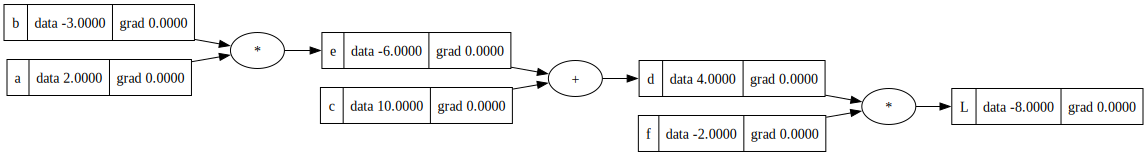

In [46]:
draw_dot(L)
# grad represents derivative of o/p w.r.t these values
# e.g: grad represents derivative of L w.r.t d as well as f

In [72]:
def lol():
    
    h = 0.001
    
    a = Value(2.0,label="a")
    b = Value(-3.0,label="b")
    c = Value(10,label="c")
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data
    
    a = Value(2.0,label="a") 
    b = Value(-3.0,label="b")
    c = Value(10,label="c")
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    d.data += h; # small increment in d
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)

# derivative of 'L' w.r.t. 'd'
lol()

-2.000000000000668


In [76]:
# L = d * f
# derivative of L w.r.t. d: 
#     dL/dd = 1 * f
#     dL/dd = -2

# Also:
#     (f(x+h) - f(x))/h
#     ((d+h)*f - d*f)/h
#     (d*f + h*f - d*f)/h
#     (h*f)/h
#     f
#     -2

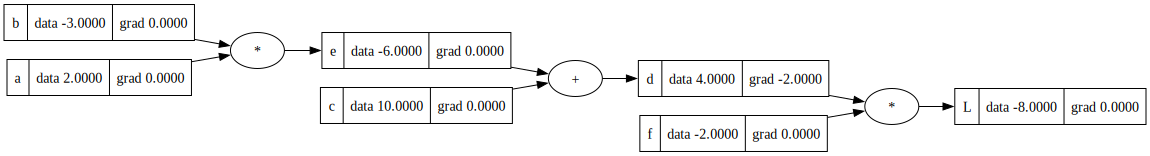

In [74]:
# Therefore
d.grad = -2.0
draw_dot(L)

In [75]:
# Similarly
def lol():
    
    h = 0.001
    
    a = Value(2.0,label="a")
    b = Value(-3.0,label="b")
    c = Value(10,label="c")
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L1 = L.data
    
    a = Value(2.0,label="a") 
    b = Value(-3.0,label="b")
    c = Value(10 + h,label="c") # small increment in c
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label='L'
    L2 = L.data
    
    print((L2 - L1)/h)

# derivative of 'L' w.r.t. 'c'
lol()

-1.9999999999988916


In [77]:
# L = d * f
# L = (e+c) * f
# (by chain rule...)
# derivative of L w.r.t. c: 
#     dL/dc = (dL/dd) * (dd/dc)
#     dL/dc = -2 * (de/dc + dc/dc)
#     dL/dc = -2 * (0 + 1)
#     dL/dc = -2 

# Also:
#     (f(x+h) - f(x))/h
#     ((e + (c+h))*f - ((e+c)*f))/h
#     ((e*f+c*f+h*f) - (e*f + c*f))/h
#     (h*f)/h
#     f
#     -2

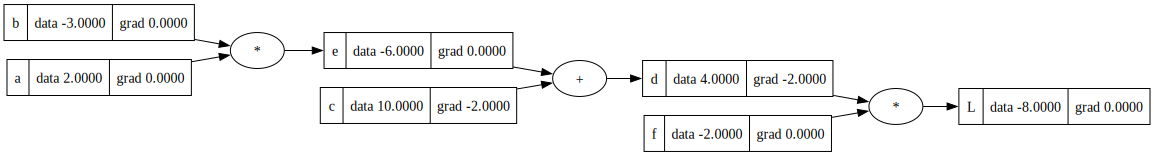

In [78]:
# Therefore
c.grad = -2.0
draw_dot(L)